In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
import pandas as pd
import numpy as np

from ipywidgets import interact

from Linear_Regression import Linear_Regression
from utils import interactive_plot

sns.set_theme()

%matplotlib widget

In [2]:
df = pd.read_csv(r'.\Recursos\08-Linear-Regression-Models\Advertising.csv')
df['total-spend'] = df.iloc[:,:-1].sum(axis=1)
df.head()

,TV,radio,newspaper,sales,total-spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


f:\Other computers\DESKTOP\UFBA\to-desktop\Curso - Machine Learning\utils.py:33: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()


interactive(children=(FloatSlider(value=0.0, description='w0', min=-100.0, step=0.001), FloatSlider(value=0.0,…

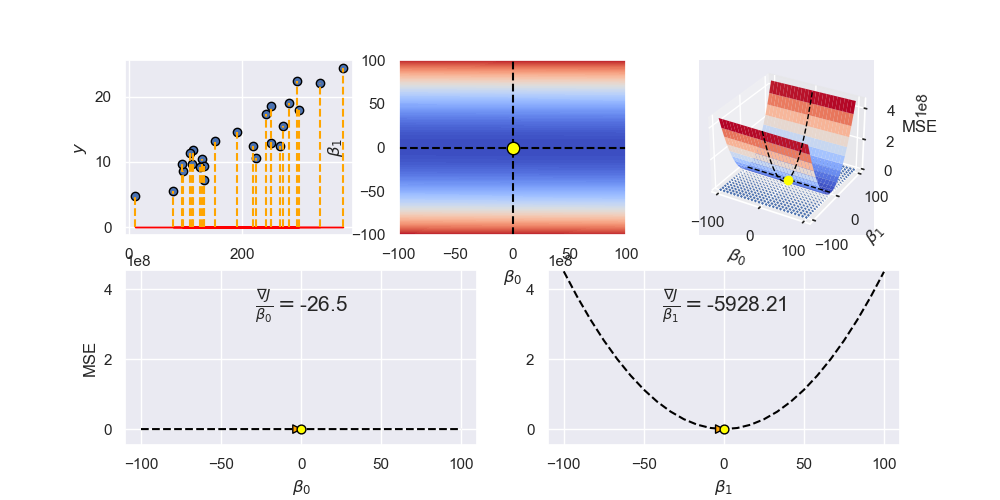

In [3]:
X = df['total-spend'].head(25).values
y = df['sales'].head(25).values

interactive_plot(X, y, 3e-6)

### DEPOIS DE NORMALIZADO

In [ ]:
X = df['total-spend'].head(25).values
X = (X - np.mean(X)) / np.std(X)

y = df['sales'].head(25).values

interactive_plot(X, y, 2.5e-1)

In [ ]:
X = df['total-spend'].head(25).values.reshape(-1,1)
X_norm = (X - np.mean(X)) / np.std(X)

y = df['sales'].head(25).values + 20

In [ ]:
model = Linear_Regression()
model_norm = Linear_Regression()

epochs = 50
history = model.fit_gd(X, y, learning_rate=1e-6, epochs=epochs)
history_norm = model_norm.fit_gd(X_norm, y, learning_rate=1e-1, epochs=epochs)

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133, sharey=ax2)

def update(epoch):
    ax1.clear()
    ax1.plot(np.log10(history['loss']), color='black', label='Custo (não normalizado)', zorder=0)
    ax1.plot(np.log10(history_norm['loss']), color='black', linestyle='--', label='Custo (normalizado)', zorder=0)
    ax1.scatter(epoch, np.log10(history['loss'][epoch]), c='yellow', ec='black', zorder=1)
    ax1.scatter(epoch, np.log10(history_norm['loss'][epoch]), c='yellow', ec='black', zorder=1)
    ax1.set_title('Curva de Aprendizado')
    ax1.set_xlabel('Época')
    ax1.set_ylabel(r'$log_{10}(\text{MSE})$')
    ax1.grid(False)
    ax1.legend()

    ax2.clear()
    ax2.scatter(X, y, color='orange', ec='black', label=r'Observado ($y$)', zorder=1)
    ax2.plot(X, history['y_pred'][epoch], color='black', linewidth=1, label=r'Calculado ($X\beta$)', zorder=0)
    ax2.set_title(f'Distribuição e Modelo Ajustado \nÉpoca: {epoch}')
    ax2.set_xlabel('X')
    ax2.set_ylabel('y')
    ax2.grid(False)
    ax2.legend()

    ax3.clear()
    ax3.scatter(X_norm, y, color='orange', ec='black', label=r'Observado ($y$)', zorder=1)
    ax3.plot(X_norm, history_norm['y_pred'][epoch], color='black', linewidth=1, label=r'Calculado ($X_{\text{norm}}\beta_{\text{norm}}$)', zorder=0)
    ax3.set_title(f'Distribuição Normalizada e Modelo Ajustado \nÉpoca: {epoch}')
    ax3.set_xlabel('X normalizado')
    ax3.set_ylabel('y')
    ax3.grid(False)
    ax3.legend()

# fig.tight_layout()
# plt.show()

interact(update, epoch=widgets.IntSlider(value=0, min=0, max=epochs-1))